In [1]:
import pandas as pd
import re

In [2]:
f = open('WhatsApp Chat with 7th Sem Unofficial.txt', 'r', encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

05/07/22, 7:15 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
06/07/20, 2:21 pm - +91 94626 24610 created group "6th Sem Unofficial"
05/07/22, 7:15 pm - +91 73076 56696 added you
05/07/22, 7:32 pm - Rajat: This message was deleted
05/07/22, 8:02 pm - +91 96946 64331: Dolly Chauhan 
Linuxworld Informatics (Jaipur)
Trainer - Vimal Daga
Contact no.(HR head) - +91 98291 05960.
05/07/22, 9:32 pm - +91 6350 364 990: Any one need internship just message me we provide internship 

Direct work on industrial live project 

Domain full stack 
Datascience

Not like small project like learning people they all are big project already running in industry already 15 people register for it
Full industry knowage it is not coaching it is company dear all 😎

You learn a practical approach to deal with direct clients
05/07/22, 9:33 pm - +91 6350 364 990: Just message me😎😀
06/07/22, 11:23 am - +91 95713 53039: 

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}\s\w{2}\s-\s'

In [6]:
message = re.split(pattern, data)[1:]
message

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 94626 24610 created group "6th Sem Unofficial"\n',
 '+91 73076 56696 added you\n',
 'Rajat: This message was deleted\n',
 '+91 96946 64331: Dolly Chauhan \nLinuxworld Informatics (Jaipur)\nTrainer - Vimal Daga\nContact no.(HR head) - +91 98291 05960.\n',
 '+91 6350 364 990: Any one need internship just message me we provide internship \n\nDirect work on industrial live project \n\nDomain full stack \nDatascience\n\nNot like small project like learning people they all are big project already running in industry already 15 people register for it\nFull industry knowage it is not coaching it is company dear all 😎\n\nYou learn a practical approach to deal with direct clients\n',
 '+91 6350 364 990: Just message me😎😀\n',
 '+91 95713 53039: This message was deleted\n',
 '+91 95713 53039: Kuldeep singh\nREDMAC Infotech pvt ltd jaipur\n',
 'Sunn

In [7]:
pattern1 = '\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}'
dates = re.findall(pattern1, data)
dates

['05/07/22, 7:15',
 '06/07/20, 2:21',
 '05/07/22, 7:15',
 '05/07/22, 7:32',
 '05/07/22, 8:02',
 '05/07/22, 9:32',
 '05/07/22, 9:33',
 '06/07/22, 11:23',
 '06/07/22, 11:24',
 '06/07/22, 12:44',
 '06/07/22, 1:40',
 '06/07/22, 2:15',
 '06/07/22, 2:27',
 '06/07/22, 9:31',
 '06/07/22, 10:06',
 '08/07/22, 3:35',
 '09/07/22, 11:18',
 '09/07/22, 12:59',
 '09/07/22, 12:59',
 '09/07/22, 2:36',
 '09/07/22, 4:58',
 '09/07/22, 5:07',
 '09/07/22, 5:08',
 '09/07/22, 5:10',
 '09/07/22, 5:11',
 '09/07/22, 5:11',
 '09/07/22, 5:15',
 '09/07/22, 5:16',
 '09/07/22, 5:16',
 '09/07/22, 5:16',
 '09/07/22, 5:16',
 '09/07/22, 5:17',
 '09/07/22, 5:18',
 '09/07/22, 5:18',
 '09/07/22, 5:19',
 '09/07/22, 5:19',
 '09/07/22, 5:19',
 '09/07/22, 5:20',
 '09/07/22, 5:20',
 '09/07/22, 5:20',
 '09/07/22, 5:20',
 '09/07/22, 5:22',
 '09/07/22, 5:23',
 '09/07/22, 5:25',
 '09/07/22, 5:25',
 '09/07/22, 5:25',
 '09/07/22, 5:55',
 '13/07/22, 2:53',
 '13/07/22, 2:54',
 '13/07/22, 2:55',
 '13/07/22, 2:56',
 '13/07/22, 2:56',
 '13/

In [8]:
df = pd.DataFrame({'user_message':message, 'message_date':dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M')

df.rename(columns = {'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-07-05 07:15:00
1,"+91 94626 24610 created group ""6th Sem Unoffic...",2020-07-06 02:21:00
2,+91 73076 56696 added you\n,2022-07-05 07:15:00
3,Rajat: This message was deleted\n,2022-07-05 07:32:00
4,+91 96946 64331: Dolly Chauhan \nLinuxworld In...,2022-07-05 08:02:00


In [9]:
df.shape

(1275, 2)

In [10]:
# separate users and message
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace = True)

df.head()

,date,user,message
0,2022-07-05 07:15:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-07-06 02:21:00,group_notification,"+91 94626 24610 created group ""6th Sem Unoffic..."
2,2022-07-05 07:15:00,group_notification,+91 73076 56696 added you\n
3,2022-07-05 07:32:00,Rajat,This message was deleted\n
4,2022-07-05 08:02:00,+91 96946 64331,Dolly Chauhan \nLinuxworld Informatics (Jaipur...


In [11]:
df['year'] = df['date'].dt.year

In [12]:
df

,date,user,message,year
0,2022-07-05 07:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022
1,2020-07-06 02:21:00,group_notification,"+91 94626 24610 created group ""6th Sem Unoffic...",2020
2,2022-07-05 07:15:00,group_notification,+91 73076 56696 added you\n,2022
3,2022-07-05 07:32:00,Rajat,This message was deleted\n,2022
4,2022-07-05 08:02:00,+91 96946 64331,Dolly Chauhan \nLinuxworld Informatics (Jaipur...,2022
...,...,...,...,...
1270,2023-02-16 10:35:00,Rajat,<Media omitted>\n,2023
1271,2023-02-16 10:36:00,Rajat,Rajat (19evjcs069)\n,2023
1272,2023-02-23 05:26:00,mayurikatara,This is the final warning and remainder to cl...,2023
1273,2023-02-23 05:28:00,mayurikatara,<Media omitted>\n,2023


In [13]:
df['month'] = df['date'].dt.month_name()

In [14]:
df['day'] = df['date'].dt.day

In [15]:
df['hour'] = df['date'].dt.hour

In [16]:
df['minute'] = df['date'].dt.minute

In [17]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-07-05 07:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,5,7,15
1,2020-07-06 02:21:00,group_notification,"+91 94626 24610 created group ""6th Sem Unoffic...",2020,July,6,2,21
2,2022-07-05 07:15:00,group_notification,+91 73076 56696 added you\n,2022,July,5,7,15
3,2022-07-05 07:32:00,Rajat,This message was deleted\n,2022,July,5,7,32
4,2022-07-05 08:02:00,+91 96946 64331,Dolly Chauhan \nLinuxworld Informatics (Jaipur...,2022,July,5,8,2


In [18]:
df[df['user'] == 'Rahul Choudhary'].shape

(7, 8)

In [19]:
words = []
for message in df['message']:
    words.extend(message.split())

In [20]:
len(words)

10186

In [21]:
from urlextract import URLExtract

extract = URLExtract()
urls = extract.find_urls("Let's www.gmial.com have URL stackoverflow.com as an example google.com, http://facebook.com")
urls

['www.gmial.com', 'stackoverflow.com', 'google.com', 'http://facebook.com']

In [22]:
links = []

for message in df['message']:
    links.extend(extract.find_urls(message))

In [23]:
len(links)

39

In [24]:
df

,date,user,message,year,month,day,hour,minute
0,2022-07-05 07:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,5,7,15
1,2020-07-06 02:21:00,group_notification,"+91 94626 24610 created group ""6th Sem Unoffic...",2020,July,6,2,21
2,2022-07-05 07:15:00,group_notification,+91 73076 56696 added you\n,2022,July,5,7,15
3,2022-07-05 07:32:00,Rajat,This message was deleted\n,2022,July,5,7,32
4,2022-07-05 08:02:00,+91 96946 64331,Dolly Chauhan \nLinuxworld Informatics (Jaipur...,2022,July,5,8,2
...,...,...,...,...,...,...,...,...
1270,2023-02-16 10:35:00,Rajat,<Media omitted>\n,2023,February,16,10,35
1271,2023-02-16 10:36:00,Rajat,Rajat (19evjcs069)\n,2023,February,16,10,36
1272,2023-02-23 05:26:00,mayurikatara,This is the final warning and remainder to cl...,2023,February,23,5,26
1273,2023-02-23 05:28:00,mayurikatara,<Media omitted>\n,2023,February,23,5,28


In [25]:
x = df['user'].value_counts().head()

In [26]:
import matplotlib.pyplot as plt

In [27]:
name = x.index
count = x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, 'mayurikatara'),
  Text(1, 0, '+91 6350 364 990'),
  Text(2, 0, '+91 73076 56696'),
  Text(3, 0, '+91 89553 76923'),
  Text(4, 0, 'group_notification')])

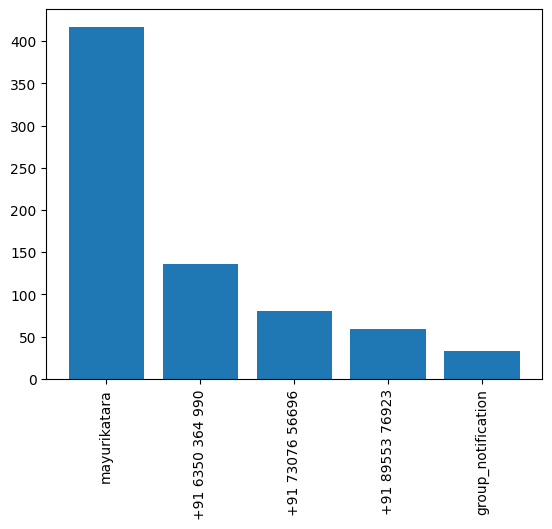

In [28]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')

In [29]:
round((df['user'].value_counts()/df.shape[0])*100, 2).reset_index().rename(columns={'index':'name', 'user':'percent'})

,name,percent
0,mayurikatara,32.71
1,+91 6350 364 990,10.67
2,+91 73076 56696,6.27
3,+91 89553 76923,4.63
4,group_notification,2.59
...,...,...
63,+91 76909 23252,0.08
64,+91 76270 87308,0.08
65,+91 73004 36136,0.08
66,+91 72320 24410,0.08


In [30]:
# remove group_notification
# rmove media omitted

temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [31]:
f = open('hnglish.txt', 'r')
stop_words = f.read()
# print(stop_words)

In [32]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [33]:
from collections import Counter
most_common_df = pd.DataFrame(Counter(words).most_common(20))

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


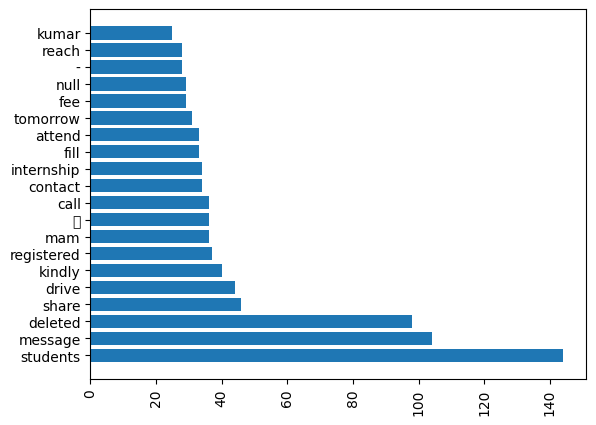

In [34]:
plt.barh(most_common_df[0], most_common_df[1])
plt.xticks(rotation = 'vertical')

In [35]:
import emoji

In [36]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [37]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

<BarContainer object of 5 artists>

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  func(*args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  func(*args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127996 (\N{EMOJI MODIF

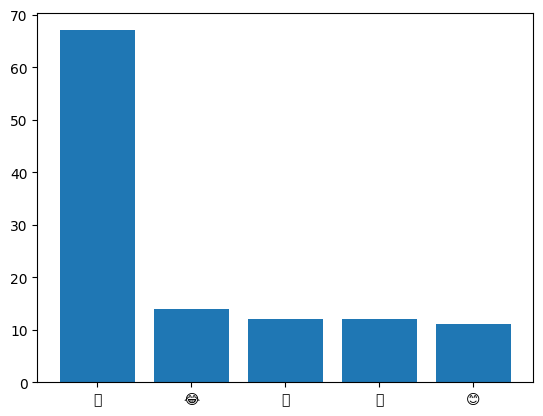

In [38]:
plt.bar(emoji_df[0].head(), emoji_df[1].head())

In [39]:
df['month_num'] = df['date'].dt.month

In [40]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [41]:
timeline

,year,month_num,month,message
0,2020,7,July,1
1,2022,7,July,295
2,2022,8,August,103
3,2022,9,September,198
4,2022,10,October,72
5,2022,11,November,223
6,2022,12,December,232
7,2023,1,January,92
8,2023,2,February,59


In [42]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [43]:
timeline['time'] = time

In [44]:
timeline

,year,month_num,month,message,time
0,2020,7,July,1,July-2020
1,2022,7,July,295,July-2022
2,2022,8,August,103,August-2022
3,2022,9,September,198,September-2022
4,2022,10,October,72,October-2022
5,2022,11,November,223,November-2022
6,2022,12,December,232,December-2022
7,2023,1,January,92,January-2023
8,2023,2,February,59,February-2023


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'July-2020'),
  Text(1, 0, 'July-2022'),
  Text(2, 0, 'August-2022'),
  Text(3, 0, 'September-2022'),
  Text(4, 0, 'October-2022'),
  Text(5, 0, 'November-2022'),
  Text(6, 0, 'December-2022'),
  Text(7, 0, 'January-2023'),
  Text(8, 0, 'February-2023')])

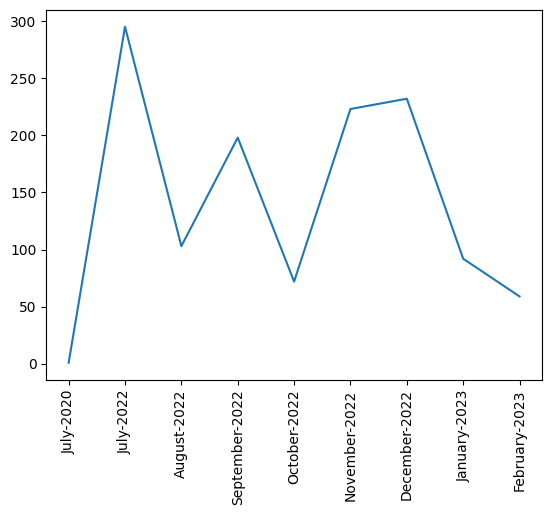

In [45]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation = 'vertical')

In [46]:
df['only_date'] = df['date'].dt.date

In [47]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

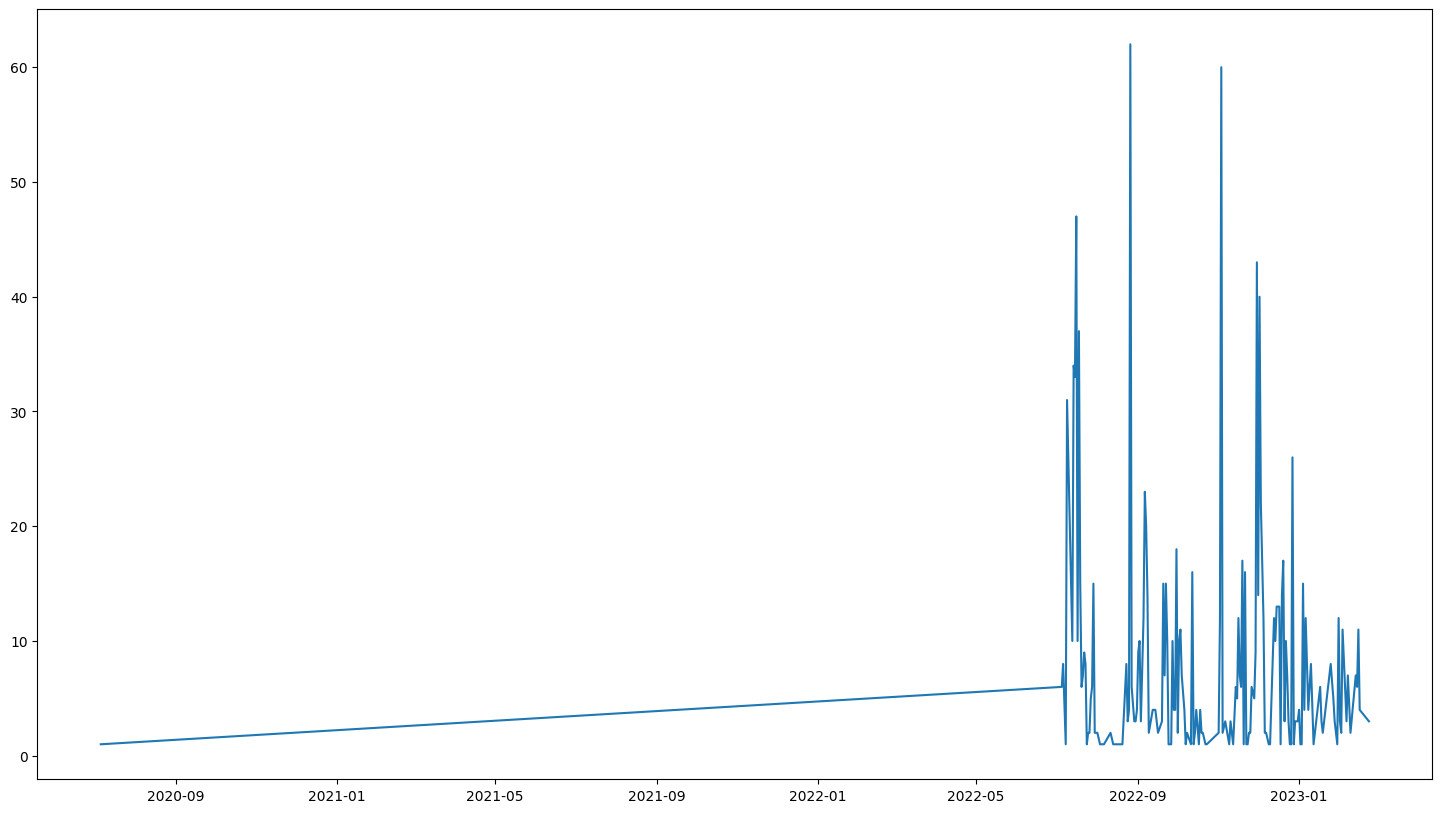

In [48]:
plt.figure(figsize=(18, 10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [49]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2022-07-05 07:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,5,7,15,7,2022-07-05
1,2020-07-06 02:21:00,group_notification,"+91 94626 24610 created group ""6th Sem Unoffic...",2020,July,6,2,21,7,2020-07-06
2,2022-07-05 07:15:00,group_notification,+91 73076 56696 added you\n,2022,July,5,7,15,7,2022-07-05
3,2022-07-05 07:32:00,Rajat,This message was deleted\n,2022,July,5,7,32,7,2022-07-05
4,2022-07-05 08:02:00,+91 96946 64331,Dolly Chauhan \nLinuxworld Informatics (Jaipur...,2022,July,5,8,2,7,2022-07-05


In [50]:
df['day_name'] = df['date'].dt.day_name()

In [51]:
df['day_name'].value_counts()

Friday       253
Thursday     236
Wednesday    216
Tuesday      212
Saturday     179
Monday       143
Sunday        36
Name: day_name, dtype: int64

In [55]:
df['month'].value_counts()

July         296
December     232
November     223
September    198
August       103
January       92
October       72
February      59
Name: month, dtype: int64

In [56]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [58]:
df['period'] = period

In [61]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2022-07-05 07:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,July,5,7,15,7,2022-07-05,Tuesday,7-8
936,2022-12-02 04:31:00,+91 83028 19261,<Media omitted>\n,2022,December,2,4,31,12,2022-12-02,Friday,4-5
620,2022-10-04 12:10:00,+91 6350 364 990,<Media omitted>\n,2022,October,4,12,10,10,2022-10-04,Tuesday,12-13
1207,2023-01-31 11:48:00,+91 6353 664 048,<Media omitted>\n,2023,January,31,11,48,1,2023-01-31,Tuesday,11-12
833,2022-11-26 01:57:00,+91 98288 41482,<Media omitted>\n,2022,November,26,1,57,11,2022-11-26,Saturday,1-2


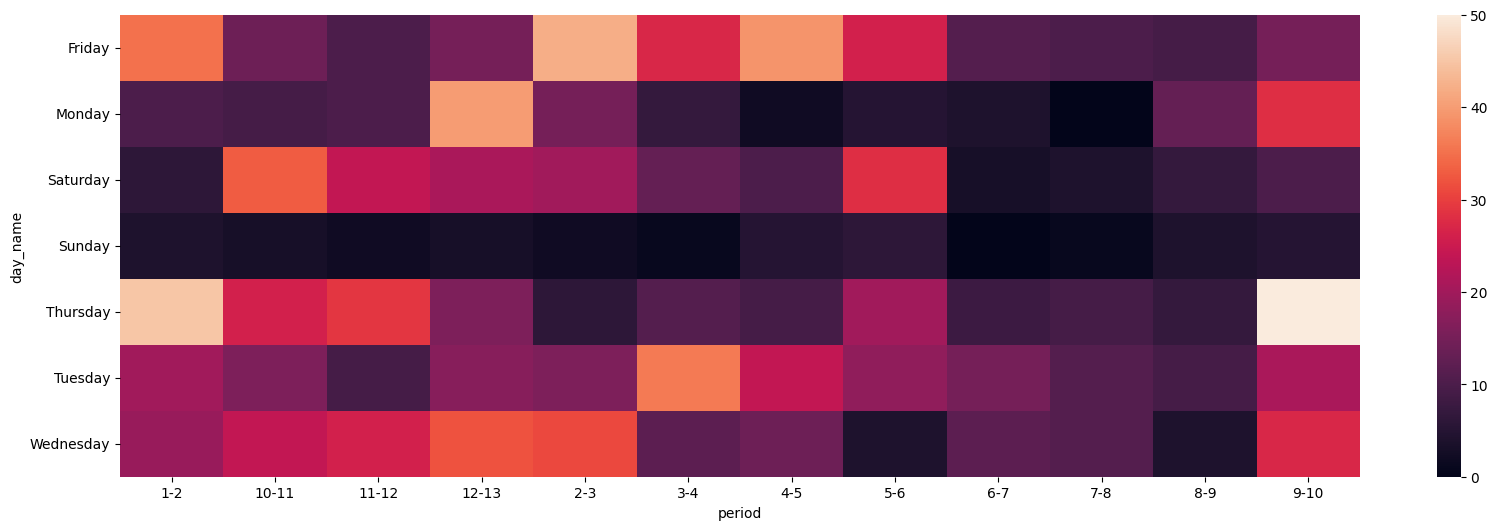

In [64]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation = 'horizontal')
plt.show()

In [65]:
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

period,1-2,10-11,11-12,12-13,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,
Friday,35.0,14.0,10.0,15.0,42.0,27.0,39.0,26.0,11.0,10.0,9.0,15.0
Monday,10.0,9.0,10.0,40.0,15.0,7.0,2.0,5.0,4.0,0.0,13.0,28.0
Saturday,6.0,33.0,24.0,21.0,20.0,13.0,10.0,28.0,3.0,4.0,7.0,10.0
Sunday,4.0,3.0,2.0,3.0,2.0,1.0,5.0,6.0,0.0,1.0,4.0,5.0
Thursday,45.0,26.0,29.0,16.0,6.0,11.0,9.0,20.0,8.0,9.0,7.0,50.0
Tuesday,20.0,16.0,9.0,17.0,16.0,36.0,24.0,18.0,15.0,11.0,9.0,21.0
Wednesday,19.0,24.0,26.0,32.0,31.0,12.0,14.0,4.0,12.0,11.0,4.0,27.0
